# **Project:** **Reverse-Engineering the H1 Neuron's Motion Filter**
This notebook analyzes real experimental data from the H1 neuron in the fly's visual system.
Our goal is to use the Spike-Triggered Average (STA) method to find the neuron's "linear filter" (f).
This filter represents the "preferred feature" or pattern in the stimulus (motion velocity) that causes the neuron to fire a spike.

This project demonstrates:
* Loading and exploring experimental data (`.pickle` files).
* Implementing the STA algorithm from scratch.
* Visualizing and (most importantly) interpreting the resulting filter.

# **Loading & Exploring data**

In [5]:
# --- 1. Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
import pickle

# --- 2. Load the Data ---
FILENAME = 'c1p8_3.4.pickle'
with open(FILENAME, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# --- 3. Explore the Data ---
print(data.keys())
stim = data['stim']
rho = data['rho']

dict_keys(['stim', 'rho'])


# **Building the filter**

In [6]:
# --- 4. Defining the filter function ---
def compute_sta(stim, rho, num_timesteps):
  sta = np.zeros((num_timesteps,))
  spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
  num_spikes = len(spike_times)

  if num_spikes == 0:
    return sta

  for time in spike_times:
    stim_window = stim[time - num_timesteps:time]
    sta += stim_window

  sta/=num_spikes
  return sta

# **Visualisation**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


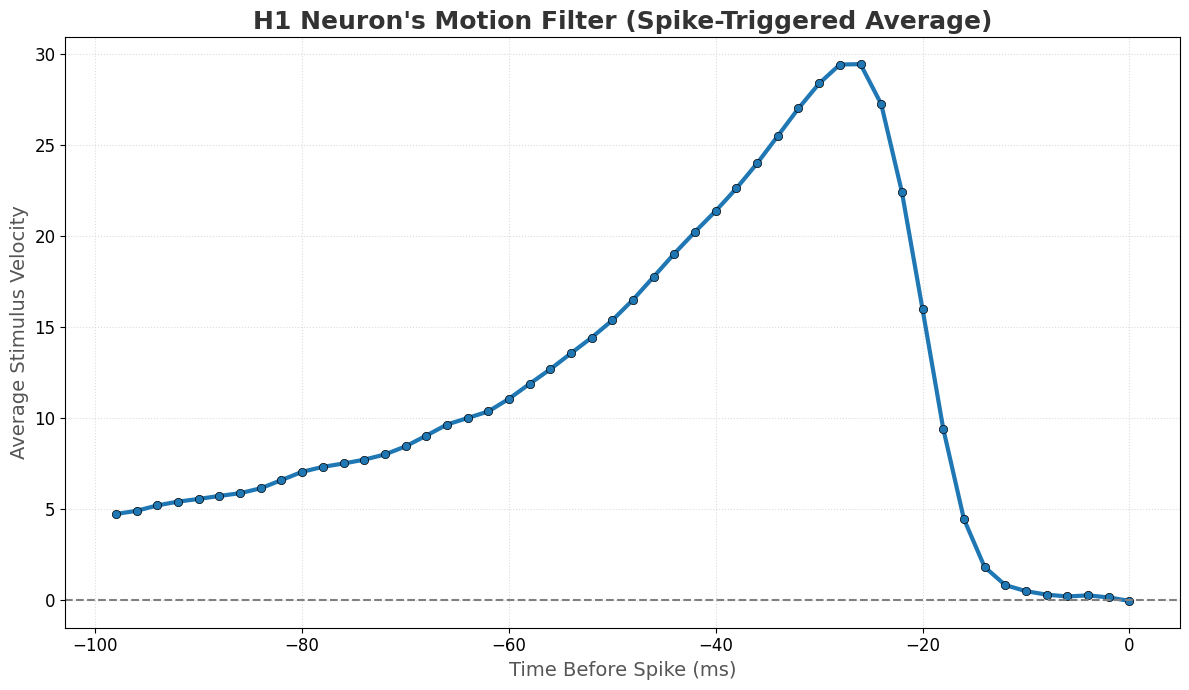

In [8]:
sampling_period = 2
num_timesteps = 50

sta = compute_sta(stim, rho, num_timesteps)

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.figure(figsize=(12, 7), dpi=100)
plt.plot(time, sta, color='#1f77b4', linewidth=3, marker='o', markersize=6, markeredgecolor='black', markeredgewidth=0.5)
plt.title('H1 Neuron\'s Motion Filter (Spike-Triggered Average)', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Time Before Spike (ms)', fontsize=14, color='#555555')
plt.ylabel('Average Stimulus Velocity', fontsize=14, color='#555555')
plt.axhline(0, color='gray', linestyle='--', linewidth=1.5)
plt.grid(True, color='#cccccc', linestyle=':', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()


# **Final Interpretation & Conclusion**

The resulting plot of the Spike-Triggered Average **(STA)** is clearly **"monophasic"** (single-phased), as it remains almost entirely in the positive domain.

**What does this tell us?**
1. Reading the Filter: The filter (the plot) shows the "preferred pattern" that leads to a spike (at Time = 0).

The filter is entirely positive, showing a single "hump" or preference.

It begins building around -100ms and reaches its sharp peak at approximately -25ms.

2. The Conclusion: Based on this data, the H1 neuron acts as a **monophasic velocity detector**.

This neuron is tuned to integrate motion in one preferred direction (positive velocity) over a ~100ms window, giving the most "weight" or importance to the stimulus that occurred ~25ms before the spike.